In [2]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt

import torch

In [10]:
df = pd.read_csv("data/wandb_logs.csv")
df = df[["Step", "misty-sun-56 - env/reward_mean", "royal-glitter-53 - env/reward_mean"]]
df.columns = ["step", "v2", "v1"]
df["step"] = df["step"] + 1
df = df.iloc[:80]
df

,step,v2,v1
0,1,0.633664,0.380246
1,2,0.534319,0.388873
2,3,0.529154,0.341248
3,4,0.600167,0.457900
4,5,0.563801,0.463326
...,...,...,...
75,76,0.777509,NaN
76,77,0.783436,NaN
77,78,0.790960,NaN
78,79,-1.000000,NaN


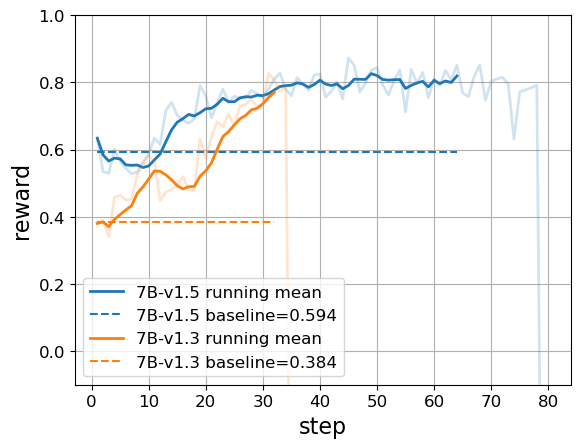

In [90]:
label_fontsize = 16
tick_fontsize = 12
linewidth = 2

# Parameters
alpha=0.2

# Plot 1
x = df["step"]
y = df["v2"]

running_mean = y.rolling(window=5, min_periods=1).mean()

plt.plot(x, y, linewidth=linewidth, color="#1f77b4", alpha=alpha, linestyle="-")
plt.plot(x[:64], running_mean[:64], linewidth=linewidth, color="#1f77b4", label="7B-v1.5 running mean")

baseline = 0.5938
plt.plot(x[:64], [baseline] * 64, color="#1f77b4", linestyle="--", label=f"7B-v1.5 baseline={baseline:.3f}")
# plt.axhline(y=baseline, color="#1f77b4", linestyle="--", label=f"7B-v1.5 baseline={baseline:.3f}")

# Put point at x=64
# plt.plot(64, running_mean[63], color="red", marker="o", markersize=4)

# Plot 2
x = df["step"]
y = df["v1"]

running_mean = y.rolling(window=5, min_periods=1).mean()

plt.plot(x, y, linewidth=linewidth, color="#ff7f0e", alpha=alpha, linestyle="-")
plt.plot(x[:32], running_mean[:32], linewidth=linewidth, color="#ff7f0e", label="7B-v1.3 running mean")

baseline = 0.3844
plt.plot(x[:32], [baseline] * 32, color="#ff7f0e", linestyle="--", label=f"7B-v1.3 baseline={baseline:.3f}")
# plt.axhline(y=baseline, color="#ff7f0e", linestyle="--", label=f"7B-v1.3 baseline={baseline:.3f}")

# Put point at x=64
# plt.plot(32, running_mean[31], color="green", marker="o", markersize=4, markeredgecolor="black")

# Set plot parameters
plt.ylim(-0.1, 1.0)

plt.grid()

plt.xlabel("step", fontsize=label_fontsize)
plt.ylabel("reward", fontsize=label_fontsize)
plt.tick_params(labelsize=tick_fontsize)

plt.legend(fontsize=tick_fontsize)

plt.savefig("outputs/experimental_runs.png", dpi=300)

Baseline: 0.5146267414093018, STD: 0.3664291799068451, 2*STD: 0.7328583598136902


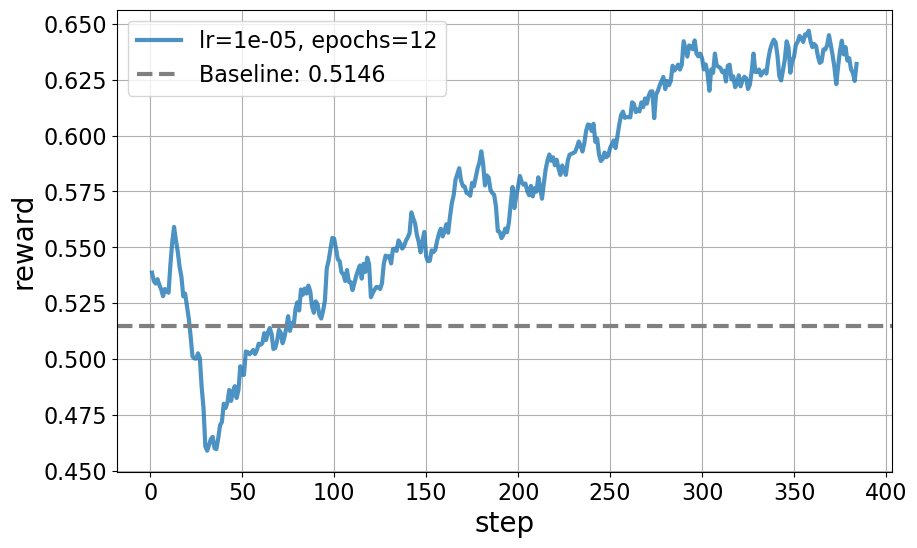

In [19]:
label_fontsize = 20
tick_fontsize = 16
linewidth = 3


def plot_rewards(df, ts_factor=0.8, label=None, alpha=1.0):
    # Calculate EMA values using provided formula
    y_ema_updated = df['Value'].ewm(alpha=(1 - ts_factor)).mean()

    # Plot original data
    # plt.plot(df['Step'], df['Value'], label='Original data')

    # Plot EMA data
    plt.plot(df['Step'], y_ema_updated, label=label, alpha=alpha, linewidth=linewidth)


# Define baseline and std
# rewards = torch.load(f"outputs/ppo_rewards_{pattern}.pt")
rewards = torch.load(f"outputs/ppo_rewards_{pattern}_len_4_2.pt")
baseline = rewards.mean()
std = rewards.std()
print(f"Baseline: {baseline}, STD: {std}, 2*STD: {2 * std}")

# Update EMA coefficient
ts_factor = 0.8

# Create the plot
plt.figure(figsize=(10, 6))

for file, label in zip(files, labels_dict[pattern]):
    # Load the CSV data into a pandas DataFrame
    df = pd.read_csv(file)
    plot_rewards(df, ts_factor=ts_factor, label=label, alpha=0.8)


# Add baseline and std
plt.axhline(y=baseline, color='grey', linestyle='--', label=f'Baseline: {baseline:.4f}', linewidth=linewidth)
# plt.fill_between(df['Step'], (baseline - std), (baseline + std), color='grey', alpha=0.5, label=f'STD: {std}')

# Add title and labels
# plt.title('TensorBoard Log Data')
plt.xlabel('step', fontsize=label_fontsize)
plt.ylabel('reward', fontsize=label_fontsize)

# Set the tick label font size
plt.tick_params(axis='both', which='major', labelsize=tick_fontsize)

# Grid
plt.grid()

# Add legend
plt.legend(fontsize=tick_fontsize)

# Display the plot
# plt.show()
plt.savefig(f'outputs/rl_{pattern}.png', dpi=300)